# Jordskjelvplotting

No skal me plotta jordskjelv! 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas

%matplotlib inline

## Innlesing av data

Me les inn datafila og opprettar ei *dataframe* gjennom pandas. Kallar den eq (kort for earthquake).

In [2]:
eq = pd.read_csv("jordskjelvdata1981-2021.csv")

Bruker shape for å sjå størrelsen på tabellen

In [3]:
eq.shape

(19568, 22)

Bruker head for å sjå dei 5 første linjene i tabellen

In [4]:
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-09-13T22:46:06.243Z,32.4550,137.8589,368.64,5.8,mww,NaN,19.0,1.773,0.90,...,2021-09-14T06:38:10.962Z,"225 km SE of Shing?, Japan",earthquake,7.5,4.2,0.048,41.0,reviewed,us,us
1,2021-09-13T05:18:13.180Z,-23.8884,-67.0152,193.38,6.2,mww,NaN,39.0,1.418,1.37,...,2021-09-14T05:22:36.336Z,"79 km WNW of San Antonio de los Cobres, Argentina",earthquake,7.5,1.1,0.044,50.0,reviewed,us,us
2,2021-09-11T09:23:05.407Z,-59.6406,-26.4133,56.07,5.5,mww,NaN,31.0,7.685,0.79,...,2021-09-12T09:26:38.356Z,South Sandwich Islands region,earthquake,10.1,5.0,0.078,16.0,reviewed,us,us
3,2021-09-10T17:07:15.452Z,-60.5865,-26.5756,10.00,5.5,mww,NaN,44.0,8.270,0.84,...,2021-09-11T19:44:53.715Z,South Sandwich Islands region,earthquake,8.5,1.7,0.065,23.0,reviewed,us,us
4,2021-09-09T04:59:43.449Z,-19.2552,-176.4147,10.00,5.8,mww,NaN,44.0,5.184,0.79,...,2021-09-13T02:22:30.894Z,"224 km WNW of Pangai, Tonga",earthquake,10.3,1.8,0.059,28.0,reviewed,us,us


In [5]:
eq.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

### Rydde i tabellen

Me har ikkje bruk for alle desse kolonnene. Rydder i tabellen slik at me kun får med dei kolonnene me treng. Vil berre ha med jordskjelv (type = earthquake).

In [6]:
eq = eq[eq['type'] == 'earthquake']
eq.shape

(19447, 22)

In [7]:
eq = eq[['time', 'latitude', 'longitude', 'depth', 'mag']]

In [8]:
eq.head()

,time,latitude,longitude,depth,mag
0,2021-09-13T22:46:06.243Z,32.4550,137.8589,368.64,5.8
1,2021-09-13T05:18:13.180Z,-23.8884,-67.0152,193.38,6.2
2,2021-09-11T09:23:05.407Z,-59.6406,-26.4133,56.07,5.5
3,2021-09-10T17:07:15.452Z,-60.5865,-26.5756,10.00,5.5
4,2021-09-09T04:59:43.449Z,-19.2552,-176.4147,10.00,5.8


## Boksplot

Lagar boksplott av datamaterialet for å få oversikt over innhaldet.

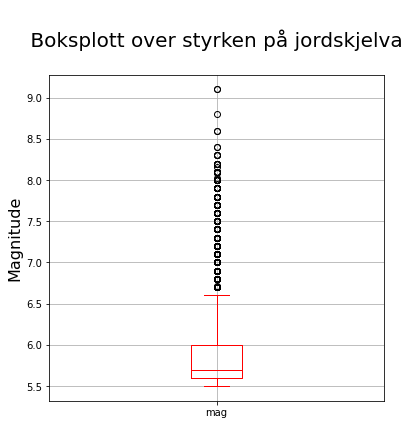

In [9]:
boksplot = eq.boxplot(column = 'mag', figsize = (6,6), color = 'red')
plt.title("\n Boksplott over styrken på jordskjelva \n", fontsize = 20)
plt.ylabel("Magnitude", fontsize = 16)
plt.show()

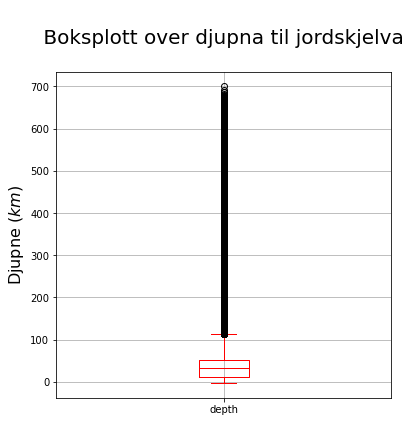

In [10]:
boksplot = eq.boxplot(column = 'depth', figsize = (6,6), color = 'red')
plt.title("\n Boksplott over djupna til jordskjelva \n", fontsize = 20)
plt.ylabel("Djupne ($km$)", fontsize = 16)
plt.show()

## Histogram

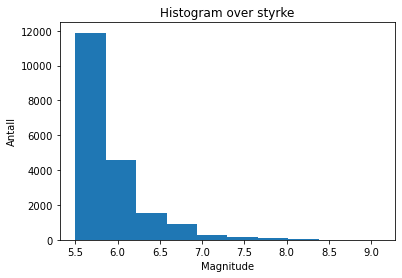

In [11]:
figur = plt.hist(eq['mag'])
plt.title("Histogram over styrke")
plt.xlabel("Magnitude")
plt.ylabel("Antall")
plt.show()

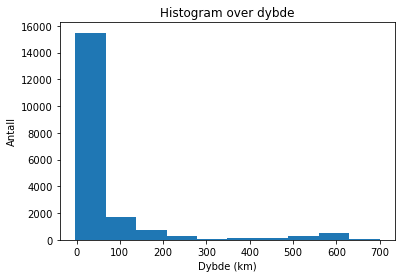

In [12]:
figur = plt.hist(eq['depth'])
plt.title("Histogram over dybde")
plt.xlabel("Dybde (km)")
plt.ylabel("Antall")
plt.show()

# GeoDataFrame

For å gjera om datamaterialet til eit plottbart materiale så skal me gjera det om til ein *GeoDataFrame* gjennom modulen GeoPandas. 

In [13]:
eq_gdf = geopandas.GeoDataFrame(eq, geometry = geopandas.points_from_xy(eq.longitude, eq.latitude))

In [14]:
eq_gdf.head()

,time,latitude,longitude,depth,mag,geometry
0,2021-09-13T22:46:06.243Z,32.4550,137.8589,368.64,5.8,POINT (137.85890 32.45500)
1,2021-09-13T05:18:13.180Z,-23.8884,-67.0152,193.38,6.2,POINT (-67.01520 -23.88840)
2,2021-09-11T09:23:05.407Z,-59.6406,-26.4133,56.07,5.5,POINT (-26.41330 -59.64060)
3,2021-09-10T17:07:15.452Z,-60.5865,-26.5756,10.00,5.5,POINT (-26.57560 -60.58650)
4,2021-09-09T04:59:43.449Z,-19.2552,-176.4147,10.00,5.8,POINT (-176.41470 -19.25520)


## Bakgrunnskart

For å plotta datamaterialet på eit kart må me ha eit kart...
Me brukar innebygde kart frå geopandas. Opprettar eit world-objekt og skriv ut det:

In [15]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

Plottar verdskartet:

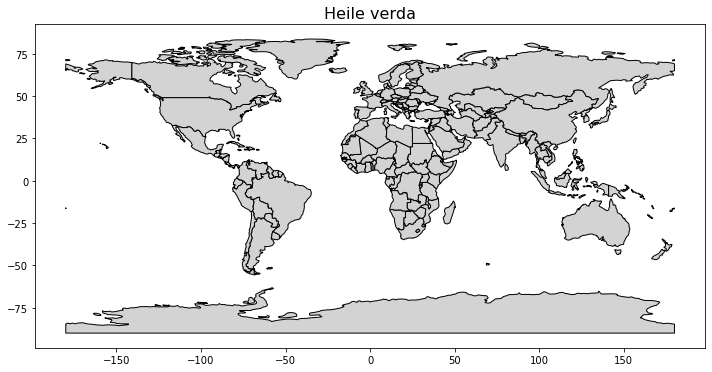

In [16]:
world.plot(color = 'lightgrey', edgecolor = 'black', figsize = (12,8))
plt.title("Heile verda", fontsize = 16)
plt.show()

## Plotte jordskjelva (fredag)

No har me både bakgrunnskart og me har laga punkt i datamaterialet. Dermed kan me plotta jordskjelva våre på kartet. 

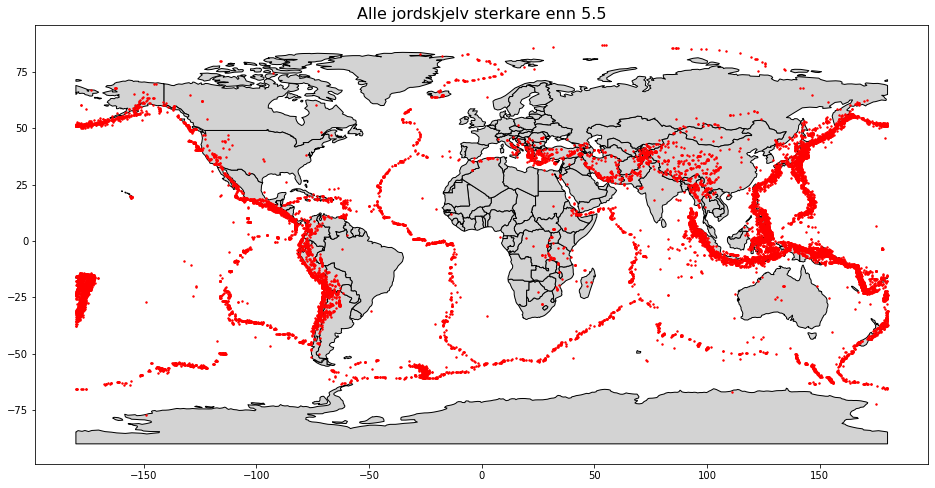

In [21]:
ax = world.plot(color = 'lightgrey', edgecolor = 'black', figsize = (16,12))
eq_gdf.plot(ax = ax, color = 'red', markersize = 2)
plt.title("Alle jordskjelv sterkare enn 5.5", fontsize = 16)
plt.show()

### Sortere ut og justere på plottet

Me såg av boksplottet at det var eit par *outliers*, sterkare skjelv "alle" dei andre. Me vil markera dei sterkaste jorskjelva på kartet. 

In [19]:
grenseverdi = 7.5 # denne kan me endra på

In [20]:
# Sortere ut dei sterkaste jordskjelva
sterke_eq = eq[(eq.mag >= grenseverdi)]

# Nullstille nummerering
sterke_eq = sterke_eq.reset_index(drop=True)

# Opprette GeoDataFrame
sterke_eq_gdf = geopandas.GeoDataFrame(sterke_eq, geometry = geopandas.points_from_xy(sterke_eq.longitude, sterke_eq.latitude))

# Viser dei fem første radene
sterke_eq_gdf.head()

,time,latitude,longitude,depth,mag,geometry
0,2021-08-12T18:35:20.989Z,-58.4513,-25.3270,55.73,8.1,POINT (-25.32700 -58.45130)
1,2021-08-12T18:32:52.464Z,-57.5674,-25.0316,47.23,7.5,POINT (-25.03160 -57.56740)
2,2021-07-29T06:15:49.188Z,55.3635,-157.8876,35.00,8.2,POINT (-157.88760 55.36350)
3,2021-03-04T19:28:33.178Z,-29.7228,-177.2794,28.93,8.1,POINT (-177.27940 -29.72280)
4,2021-02-10T13:19:55.530Z,-23.0511,171.6566,10.00,7.7,POINT (171.65660 -23.05110)


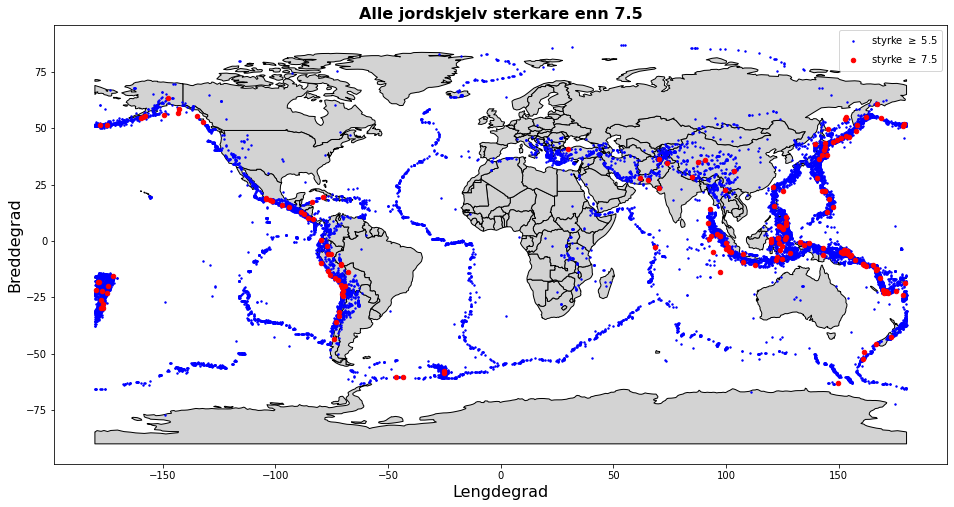

In [25]:
ax = world.plot(color = 'lightgrey', edgecolor = 'black', figsize = (16,12))

# alle skjelv
eq_gdf.plot(ax = ax, color = 'blue', markersize = 2)

# sterke skjelv
sterke_eq_gdf.plot(ax = ax, color = 'red', markersize = 20)

# Pynte litt på plottet
plt.title("Alle jordskjelv sterkare enn " + str(grenseverdi), fontsize = 16, fontweight = 'bold')

plt.xlabel("Lengdegrad", fontsize = 16)
plt.ylabel("Breddegrad", fontsize = 16)

plt.legend(["styrke $\geq$ 5.5", "styrke $\geq$ 7.5"])

# Eventuell lagring av figuren
# plt.savefig("jordskjelv_over_" + str(grenseverdi) + ".png", dpi = 200, bbox_inches = 'tight')

plt.show()

# Zoome inn på Asia/Oseania

Me må finna passande avgrensingar i lengde- og breddegrad. Prøver oss fram:

In [31]:
# Avgrensingar for rådata og kartplotting
lat_min = - 25
lat_max = 60
long_min = 85
long_max = 170

# Lagar ein ny DataFrame med alle jordskjelv i området
oseania_eq = eq[(eq.latitude > lat_min) & (eq.latitude < lat_max) & (eq.longitude > long_min) & (eq.longitude < long_max)]

# Nullstiller indeksen
oseania_eq = oseania_eq.reset_index(drop=True)

# Sjekker dei første linjene
oseania_eq.head()



,time,latitude,longitude,depth,mag,geometry
0,2021-09-13T22:46:06.243Z,32.4550,137.8589,368.64,5.8,POINT (137.85890 32.45500)
1,2021-09-03T10:14:26.398Z,49.4723,146.9881,581.74,5.8,POINT (146.98810 49.47230)
2,2021-08-28T12:27:23.119Z,-3.5343,140.1169,10.00,5.5,POINT (140.11690 -3.53430)
3,2021-08-27T10:22:26.409Z,5.7124,125.2400,39.02,5.6,POINT (125.24000 5.71240)
4,2021-08-26T02:14:22.068Z,-0.8537,121.5231,8.00,5.5,POINT (121.52310 -0.85370)


In [32]:
# Opprettar GeoDataFrame
oseania_eq_gdf = geopandas.GeoDataFrame(oseania_eq, geometry = geopandas.points_from_xy(oseania_eq.longitude, oseania_eq.latitude))

### Plotte det avgrensa området

No skal me plotta det avgrensa området og dei aktuelle jordskjelva

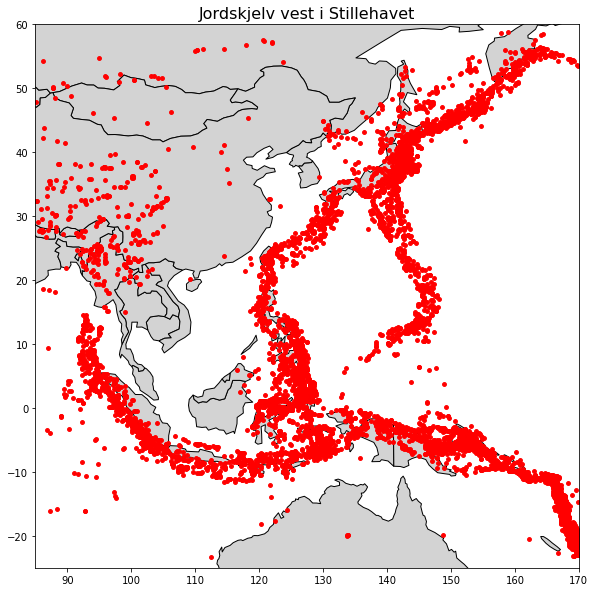

In [35]:
ax = world.plot(color = 'lightgrey', edgecolor = 'black', figsize = (10,10))
oseania_eq_gdf.plot(ax = ax, color = 'red', markersize = 15)

ax.set_ylim([lat_min, lat_max])
ax.set_xlim([long_min, long_max])

plt.title("Jordskjelv vest i Stillehavet", fontsize = 16)

plt.show()

### Plotte ulik farge etter djupne

Me er interessert i å skilja jordkjelva i grunne, middels og djupe skjelv. 
Sorterer jordskjelva i tre separate geodataframes:

In [34]:
oseania_djup = oseania_eq_gdf[(oseania_eq_gdf.depth > 300)] # d > 300 km

oseania_mid = oseania_eq_gdf[(oseania_eq_gdf.depth <= 300) & (oseania_eq_gdf.depth > 30)] #  30 km < d < 300 km

oseania_grunn = oseania_eq_gdf[(oseania_eq_gdf.depth <= 30)] # d <30 km

#### Plotting

Plotting og pynting

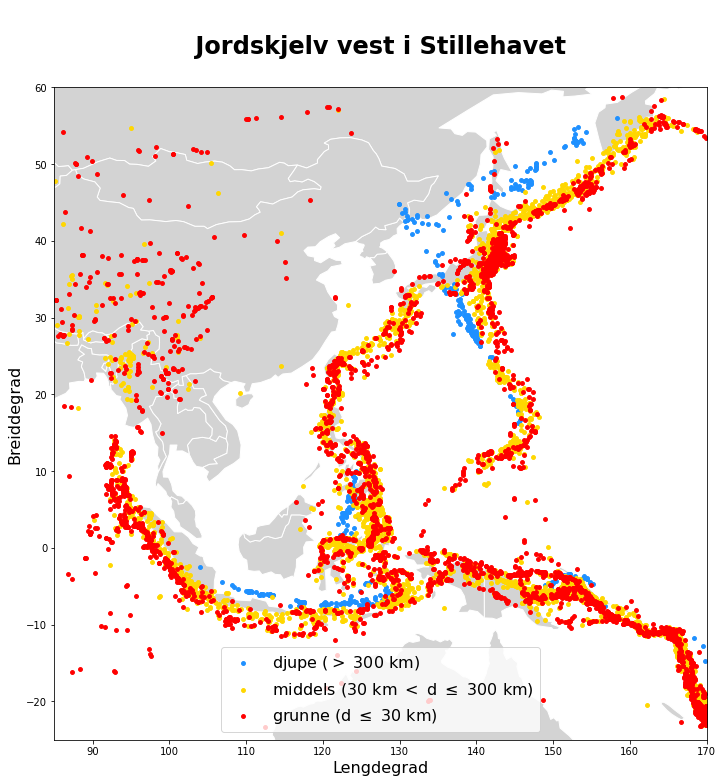

In [40]:
# Teiknar verda
ax = world.plot(color = 'lightgrey', edgecolor = 'white', figsize = (12,12))

# Avgrensar kartet 
ax.set_ylim([lat_min, lat_max])
ax.set_xlim([long_min, long_max])

# Plotte djupnene
oseania_djup.plot(ax = ax, color = 'dodgerblue', markersize = 15)
oseania_mid.plot(ax = ax, color = 'gold', markersize = 15)
oseania_grunn.plot(ax = ax, color = 'red', markersize = 15)

# Tittel, aksenamn og teiknforklaring
plt.title("\n Jordskjelv vest i Stillehavet \n", fontsize = 24, fontweight = 'bold')
plt.xlabel("Lengdegrad", fontsize = 16)
plt.ylabel("Breiddegrad", fontsize = 16)
plt.legend(["djupe ($>$ 300 km)", "middels (30 km $<$ d $\leq$ 300 km)", "grunne (d $\leq$ 30 km)"], fontsize = 16)

# Eventuell lagring av figuren
# plt.savefig("jordskjelv_vest_i_stillehavet.png", dpi = 200, bbox_inches = 'tight')

plt.show()

## Sør-Amerika og Nazcaplata

Prøv å lag eit plott av Sør-Amerika (med djupe, middels og grunne skjelv)

avgrensing

sortere ut data

plotte

Kanskje de kan prøva å sortera ut dei sterke (f.eks >8) i nokre av områda?